# UNAD  
**Michel Dayana**  

**Regresion Lineal SIMPLE**

## predecir el precio del automóvil en función de sus atributos.  

### Pasos de la Actividad  

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.  
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.  
5. Entrenar el modelo configurando los diferentes hiperparámetros.  
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.  
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.  
8. Interpretar, analizar y documentar los resultados obtenidos.  
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados [GitHub](https://github.com/).  

In [5]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Estilo de los gráficos
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [7]:
# Cargamos los datos desde el archivo CSV
data = pd.read_csv("C:/Users/MAURICIO NAVARRO/Downloads/car details v4.csv")

# Mostramos el tamaño del dataset
data.shape


(2059, 20)

In [9]:
# Primeras filas del dataset
data.head()


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [11]:
# Estadísticas básicas
data.describe()


,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [13]:
# Verificamos valores nulos
data.isnull().sum()


Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [15]:
# Eliminamos nulos si existen
data = data.dropna()


In [19]:
print(data.columns)

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')


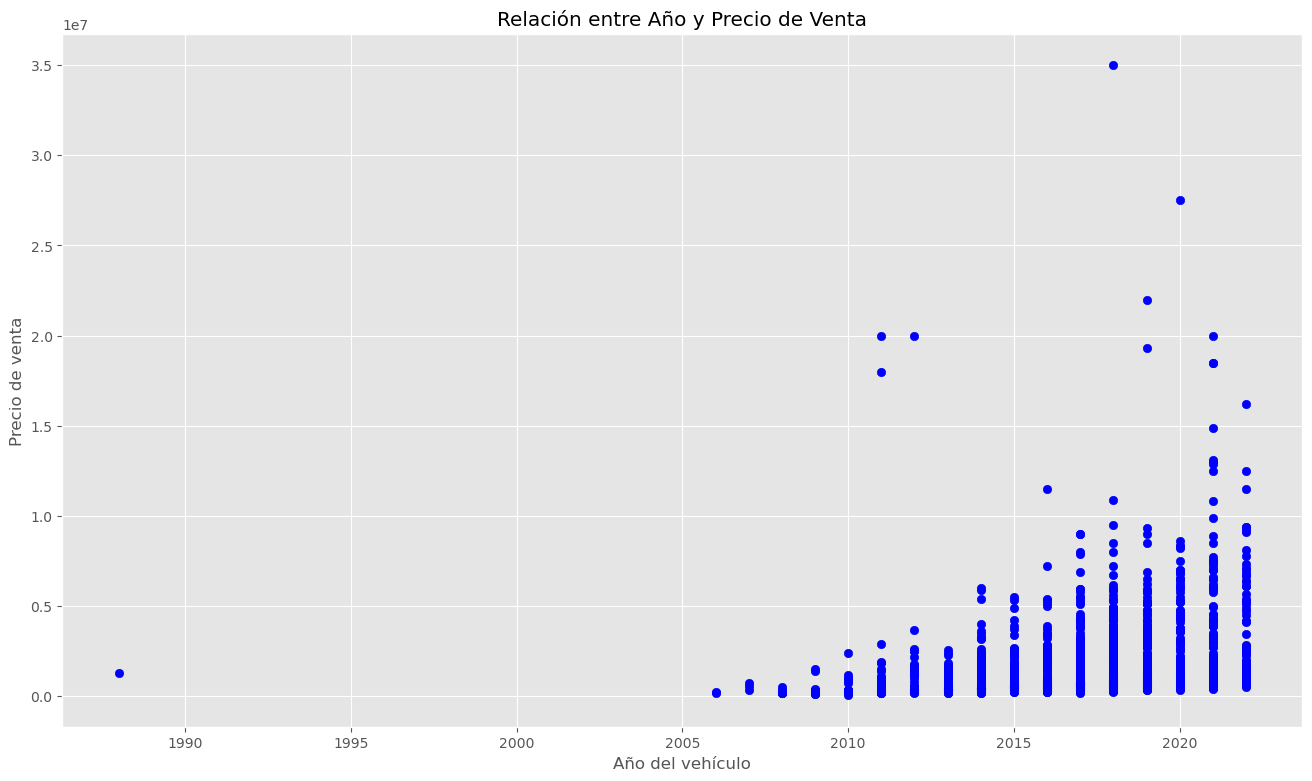

In [21]:
plt.scatter(data['Year'], data['Price'], color='blue')
plt.xlabel("Año del vehículo")
plt.ylabel("Precio de venta")
plt.title("Relación entre Año y Precio de Venta")
plt.show()


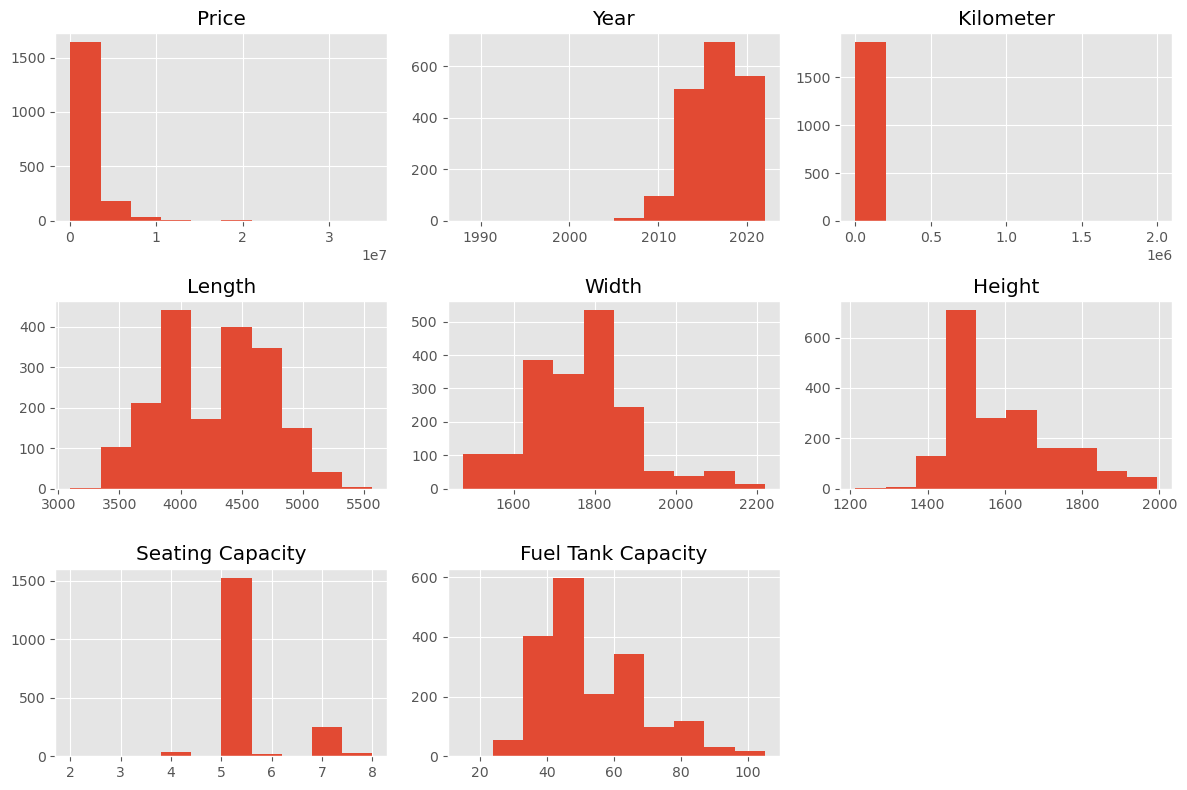

In [53]:
import matplotlib.pyplot as plt

# Visualizamos rápidamente las características de entrada (eliminando columnas no relevantes)
data.drop(['Make', 'Location'], axis=1).hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


In [25]:
# Revisión de valores nulos
print(data.isnull().sum())


Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


In [37]:
# Seleccionamos solo las columnas necesarias
x = data[['Year']]  # variable independiente
y = data['Price']  # variable dependiente


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [41]:
# Creamos el modelo de regresión lineal
modelo = linear_model.LinearRegression()

# Entrenamos el modelo
modelo.fit(x_train, y_train)


LinearRegression()

In [43]:
# Realizamos predicciones con el conjunto de prueba
y_pred = modelo.predict(x_test)

# Evaluamos el modelo
print("Error cuadrático medio (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("Coeficiente de determinación R^2: %.2f" % r2_score(y_test, y_pred))


Error cuadrático medio (MSE): 10868236786063.90
Coeficiente de determinación R^2: 0.07


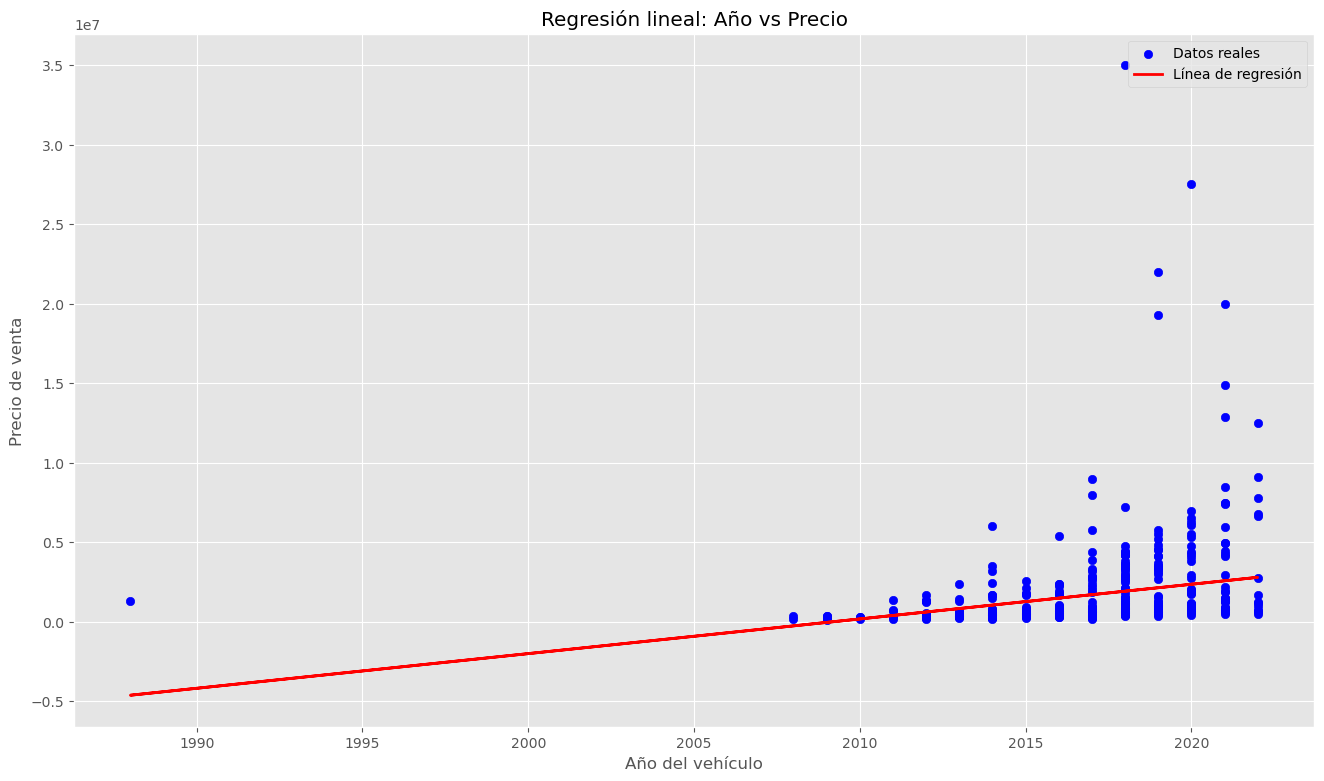

In [45]:
# Visualización de la línea de regresión
plt.scatter(x_test, y_test, color='blue', label='Datos reales')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel("Año del vehículo")
plt.ylabel("Precio de venta")
plt.title("Regresión lineal: Año vs Precio")
plt.legend()
plt.show()


In [47]:
print("Intercepto:", modelo.intercept_)
print("Coeficiente (pendiente):", modelo.coef_[0])


Intercepto: -438145367.16394585
Coeficiente (pendiente): 218069.9746237151


# Análisis e interpretación del código de regresión lineal simple.
**Contexto general:** Este código es un ejemplo Este código es un ejemplo de regresión lineal simple para predecir el precio de un automóvil en función de uno de sus atributos, que en este caso es el "Año del vehículo" . La regresión lineal simple es un modelo estadístico utilizado para entender la relación entre dos variables: una dependiente (en este caso, el precio) y una independiente (el año del vehículo).

## Pasos descritos en el código:

### predicción con el conjunto de prueba:

pitón

Copiar

Editar
y_pred = modelo.predict(x_test)
) realiza predicciones sobre el conjunto de prueba ( ) , que contiene los años de los_Aquí, el modelo entrenado ( modelo) realiza predicciones sobre el conjunto de prueba ( x_test), que contiene los años de los vehículos. El resultado de y_predson los precios de venta predichos para esos años.

Evaluación del modelo:

pitón

Copiar

Editar
print("Error cuadrático medio (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("Coeficiente de determinación R^2: %.2f" % r2_score(y_test, y_pred))
Se utilizan dos métricas para evaluar el rendimiento del modelo:

Error Cuadrático Medio (MSE) : Mide la diferencia promedio entre los valores reales ( y_test) y los valores predichos ( y_pred). Un valor bajo de MSE indica que el modelo está haciendo buenas predicciones. En este caso, el MSE es 10868236786063.90 , lo cual es relativamente alto y sugiere que el modelo no está funcionando bien.

Coeficiente de Determinación R^2 : Mide qué tan bien el modelo explica la variabilidad de los datos. En este caso, el valor de 0.07 indica que el modelo explica solo un 7% de la variabilidad del precio del automóvil en función de su año, lo que sugiere un desempeño deficiente, ya que se espera que R^2 esté cerca de 1 para un buen modelo.

Visualización de la línea de regresión:

pitón

Copiar

Editar
plt.scatter(x_test, y_test, color='blue', label='Datos reales')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel("Año del vehículo")
plt.ylabel("Precio de venta")
plt.title("Regresión lineal: Año vs Precio")
plt.legend()
plt.show()
Se crea un gráfico de dispersión donde los puntos azules representan los valores reales de los precios de los vehículos (en función del año).

Luego, se traza la línea de regresión (en rojo), que muestra la relación entre el año del vehículo y el precio de venta según lo predicho por el modelo.

Este gráfico permite visualizar cómo el modelo está ajustando los datos reales y si la línea de regresión realmente refleja una relación significativa.

Intercepción y coeficiente (pendiente) de la recta:

pitón

Copiar

Editar
print("Intercepto:", modelo.intercept_)
print("Coeficiente (pendiente):", modelo.coef_[0])
Intercepto : El valor de -438145367.16 significa que, según el modelo, cuando el año del vehículo es 0, el precio de venta predicho sería este valor. Este número no tiene mucho sentido en términos prácticos, ya que un vehículo no puede tener un año 0, pero es parte de la fórmula de la regresión.

Coeficiente (pendiente) : El valor de 218069.97 indica la tasa de cambio del precio con respecto al año del vehículo. Es decir, por cada incremento de 1 año en el vehículo, el precio de venta predicho aumentaría aproximadamente 218069.97 unidades monetarias.

Interpretación de los resultados:
El modelo de regresión lineal simple intenta predecir el precio de un automóvil en función de su año . Sin embargo, el modelo tiene un rendimiento bajo debido a la baja R^2 (0.07) , lo que indica que el año del vehículo no es un predictor muy eficaz del precio del automóvil por sí solo. Existen otros factores, como el kilometraje, el tipo de combustible, la marca, entre otros, que probablemente influyan más en el precio.

El MSE alto (10868236786063.90) también sugiere que las predicciones no están siendo muy precisas.

En cuanto a los coeficientes, el intercepto negativo no tiene mucha práctica de interpretación, ya que no tiene sentido un vehículo con un precio negativo cuando el año es 0. Sin embargo, el coeficiente de pendiente (218069.97) indica que, según este modelo, a medida que aumenta el año del vehículo, el precio predicho aumenta significativamente.

Mejoras posibles:
Incluir más variables : Para mejorar el modelo, se podrían agregar más características como el kilometraje , tipo de combustible , marca , modelo , entre otras, que tienen un impacto real en el precio de un automóvil.

Modelos más complejos : Dado que la regresión lineal simple no está funcionando bien, podrías probar con regresión lineal múltiple (que usa Múltiples características) o incluso modelos más complejos como árboles de decisión o redes neuronales .

Análisis de valores atípicos y normalización : Revisa si hay valores atípicos (outliers) en los datos que puedan estar afectando las predicciones. También puede ser útil normalizar o escalar las características para mejorar el rendimiento del modelo.

